In [3]:
import pandas as pd
import swifter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)
import warnings; warnings.simplefilter('ignore')


In [4]:
train = pd.read_csv("/data/semeval-2020/task-7/task-1/train.csv")
dev = pd.read_csv("/data/semeval-2020/task-7/task-1/dev.csv")

In [5]:
train.head(100) 

,id,original,edit,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4
4,6164,Trump was told weeks ago that Flynn misled <Vice/> President .,school,0,0.0
5,8832,"All 22 <promises/> Trump made in his speech to Congress , in one chart",sounds,22200,1.2
6,12174,New DOJ alert system will flag <crimes/> against police,laughter,32100,1.2
7,3731,"As Someone Who Grew Up Among Fundamentalist <Christians/> In The US , I 'm Surprised Anyone 's Surprised About Roy Moore",morons,21110,1.0
8,6554,"Canadians may pay more taxes than Americans , but here 's what they get for their <money/>",loonies,10000,0.2
9,14191,Dutch minister resigns in drug baron <row/>,blow,0,0.0


In [6]:
dev.head(5)

,id,original,edit
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans
1,12736,Special <prosecutor/> appointed to Trump Russia,chef
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds
4,5087,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,balloon


In [7]:
train["grade_round"] = train["meanGrade"].apply(lambda x:round(x))

In [8]:
train["grade_round"].value_counts()

1    5380
0    2557
2    1662
3    53  
Name: grade_round, dtype: int64

In [9]:
from functools import partial 
def get_grade(position,grades):
    s_grades = str(grades)
    if len(s_grades) > 1:
        return int(s_grades[position])
    return 0

In [10]:
train["grades_0"]  = train["grades"].apply(partial(get_grade,0))
train["grades_1"]  = train["grades"].apply(partial(get_grade,1))
train["grades_2"]  = train["grades"].apply(partial(get_grade,2))
train["grades_3"]  = train["grades"].apply(partial(get_grade,3))
train["grades_4"]  = train["grades"].apply(partial(get_grade,4))

In [11]:
train.head(4)

,id,original,edit,grades,meanGrade,grade_round,grades_0,grades_1,grades_2,grades_3,grades_4
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2,0,1,0,0,0,0
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6,2,3,3,1,1,0
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0,1,2,2,1,0,0
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4,0,2,0,0,0,0


In [12]:
train["grades_0"].value_counts().sort_index()

0    523 
1    2296
2    3657
3    3176
Name: grades_0, dtype: int64

In [13]:
train["grades_1"].value_counts().sort_index()

0    1896
1    3816
2    3071
3    869 
Name: grades_1, dtype: int64

In [14]:
train["grades_2"].value_counts().sort_index()

0    3744
1    4030
2    1669
3    209 
Name: grades_2, dtype: int64

In [15]:
train["grades_3"].value_counts().sort_index()

0    6082
1    2875
2    652 
3    43  
Name: grades_3, dtype: int64

In [16]:
train["grades_4"].value_counts().sort_index()

0    8194
1    1286
2    159 
3    13  
Name: grades_4, dtype: int64

In [17]:
train[["grades_0","grades_1","grades_2","grades_3","grades_4",]].corr()

,grades_0,grades_1,grades_2,grades_3,grades_4
grades_0,1.000000,0.698856,0.583794,0.461843,0.310989
grades_1,0.698856,1.000000,0.758117,0.594765,0.415892
grades_2,0.583794,0.758117,1.000000,0.721038,0.496102
grades_3,0.461843,0.594765,0.721038,1.000000,0.641948
grades_4,0.310989,0.415892,0.496102,0.641948,1.000000


In [18]:
train[["grades_0","grades_1","grades_2","grades_3","grades_4",]].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


,grades_0,grades_1,grades_2,grades_3,grades_4
grades_0,1.000000,-0.034033,0.042502,0.031854,0.003667
grades_1,-0.034033,1.000000,0.139522,0.019480,-0.048826
grades_2,0.042502,0.139522,1.000000,0.721038,0.496102
grades_3,0.031854,0.019480,0.721038,1.000000,0.641948
grades_4,0.003667,-0.048826,0.496102,0.641948,1.000000


In [19]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

### Word cloud for grade0

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'wordcloud'

In [15]:
import re
def prepare_edited_new_headline(row):
    original_head_line = row.original
    edit = row.edit
    return re.sub(r'<.*/>', edit, original_head_line)

In [16]:
train["edited_head_line"]= train.swifter.apply(prepare_edited_new_headline,axis=1)
dev["edited_head_line"]= dev.swifter.apply(prepare_edited_new_headline,axis=1)

In [17]:
def get_original_headline(headline):
    return headline.replace("<","").replace("/>","")

In [18]:
original_headlines_train = train["original"].swifter.apply(get_original_headline)
original_headlines_dev = dev["original"].swifter.apply(get_original_headline)
edited_headlines_train = train["edited_head_line"]
edited_headlines_dev = train["edited_head_line"]

In [19]:
original_headlines_train.append(original_headlines_dev).to_csv("original_headlines.csv",index=False,header=True)
edited_headlines_train.append(edited_headlines_dev).to_csv("edited_headlines.csv",index=False,header=True)

In [20]:
from fastai.text import *

In [21]:
data_lm = TextLMDataBunch.from_csv(".","edited_headlines.csv",bs=64,text_cols="edited_head_line")

In [22]:
data_lm.batch_size

64

In [23]:
learn = language_model_learner(data_lm, TransformerXL, drop_mult=0.5).to_fp16()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-03
Min loss divided by 10: 1.45E-02


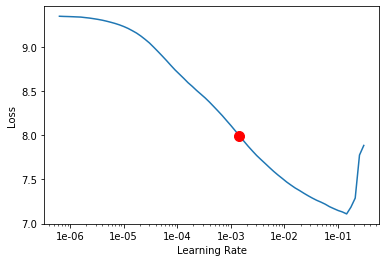

In [24]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(30, 1e-4)


epoch,train_loss,valid_loss,accuracy,time
0,8.117517,7.522672,0.228725,00:17
1,7.496244,7.153182,0.228725,00:17
2,7.062949,6.666486,0.248131,00:17
3,6.561476,6.099568,0.254492,00:18
4,6.041293,5.623710,0.277999,00:18
5,5.639456,5.331472,0.296150,00:18
6,5.348311,5.109605,0.317592,00:17
7,5.102432,4.910217,0.336035,00:18
8,4.877891,4.719047,0.350921,00:19
9,4.669271,4.550602,0.370508,00:18


In [26]:
# learn.unfreeze()
# learn.fit_one_cycle(16, 1e-3)

In [27]:
learn.save_encoder('ft_enc')


In [28]:
min(train["meanGrade"])

0.0

In [29]:
max(train["meanGrade"])

3.0

In [30]:
train["original_plus_edited"] = train.swifter.apply(lambda x: x.original + x.edited_head_line,axis=1)

In [31]:
dev["original_plus_edited"] = dev.swifter.apply(lambda x: x.original + x.edited_head_line,axis=1)

In [53]:
data_regr = (TextList.from_df(df=train, path=".", cols=['edited_head_line'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('grades_4')
             .add_test(TextList.from_df(df=dev, path=".", cols=['edited_head_line']))
             .databunch(bs=32))

In [54]:
learn = text_classifier_learner(data_regr, 
                                arch = TransformerXL, 
                                drop_mult=0.3).to_fp16()
# learn.loss_func=MSELossFlat()
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos xxmaj france is ‘ hunting down its citizens who joined xxunk ’ without trial in xxmaj iraq,xxbos xxmaj iceland xxup pm xxmaj calls xxmaj snap xxmaj vote as xxmaj pedophile xxmaj furor xxmaj crashes party,xxbos xxmaj trump was told weeks ago that xxmaj flynn misled school xxmaj president .,xxbos xxmaj all 22 sounds xxmaj trump made in his speech to xxmaj congress , in one chart,xxbos xxmaj as xxmaj someone xxmaj who xxmaj grew xxmaj up xxmaj among xxmaj fundamentalist morons xxmaj in xxmaj the xxup us , i ' m xxmaj surprised xxmaj anyone 's xxmaj surprised xxmaj about xxmaj roy xxmaj moore
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos xxmaj north xxmaj korea : xxmaj popularity of ' xxmaj fire and tantrums ' foretells xxmaj trump 's end .,xxbos xxmaj russia xxmaj will xxmaj test ' xxmaj unstoppable ' xxmaj satan xxmaj prayer by xxmaj end of 2017 , xxmaj says xxmaj mil

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 4.37E-02


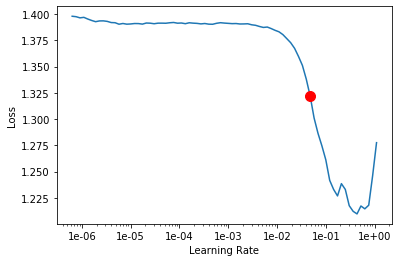

In [55]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [56]:
learn.fit_one_cycle(16,2e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.505888,0.480560,0.852850,00:06
1,0.496334,0.596042,0.849223,00:06
2,0.520417,0.639721,0.850259,00:06
3,0.547498,0.882361,0.850259,00:06
4,0.538726,3.257011,0.849223,00:06
5,0.555453,1.487778,0.833679,00:06
6,0.551548,0.531522,0.852332,00:06
7,0.559171,2.708189,0.844041,00:07
8,0.549872,0.512301,0.851813,00:06
9,0.533338,0.986553,0.850777,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.75E-03


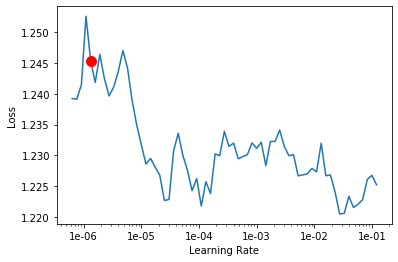

In [36]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(8,1e-6)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.249910,0.343139,0.582128,00:21
1,0.271894,0.346272,0.584802,00:21
2,0.268247,0.356121,0.592847,00:21
3,0.265909,0.352218,0.589731,00:21
4,0.257079,0.352574,0.589827,00:21
5,0.261284,0.349830,0.587375,00:21
6,0.259421,0.349060,0.586777,00:21
7,0.248964,0.347150,0.585323,00:20


In [26]:
learn.show_results(10)

text,target,prediction
xxbos xxmaj alabama xxmaj secretary of xxmaj quarterback ’s xxmaj office on xxmaj pro - xxmaj doug xxmaj jones xxup pac ’s xxmaj voter xxmaj intimidation xxmaj effort : ‘ a xxmaj targeted xxmaj effort to xxmaj misinform and xxmaj confuse xxmaj voters ’,0.2,[0.910645]
xxbos xxmaj alabama xxmaj secretary of xxmaj state ’s xxmaj office on xxmaj pro - xxmaj doug xxmaj jones xxup pac ’s xxmaj voter xxmaj intimidation xxmaj effort : ‘ a xxmaj targeted xxmaj effort to xxmaj misinform and kidnap xxmaj voters ’,0.2,[0.918945]
xxbos xxmaj alabama xxmaj secretary of xxmaj state ’s xxmaj office on xxmaj pro - xxmaj doug xxmaj jones xxup pac ’s xxmaj voter xxmaj intimidation xxmaj effort : ‘ a xxmaj targeted xxmaj effort to xxmaj misinform and xxmaj confuse toddlers ’,1.2,[0.812988]
xxbos xxmaj trump xxmaj tried xxmaj to xxmaj seduce xxmaj heather xxmaj heyer ’s xxmaj mother xxmaj during xxmaj funeral : ‘ i xxmaj have xxmaj not xxmaj and xxmaj now i xxmaj will xxmaj not ’ xxmaj talk xxmaj to xxmaj him,1.8,[1.328125]
xxbos mccain : xxmaj abandoning xxmaj obligations of xxmaj int ' l xxmaj leadership for ' xxmaj half - xxmaj baked ' xxmaj nationalism ' xxmaj as xxmaj unpatriotic ' xxmaj as ' xxmaj any xxmaj other xxmaj tired trees ' (,0.2,[0.510254]


In [42]:
dev_set_predictions = learn.get_preds(DatasetType.Test)

In [43]:
dev["pred"] = dev_set_predictions[0].numpy()

In [44]:
dev.head()

,id,original,edit,edited_head_line,original_plus_edited,pred
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans,Thousands of gay and bisexual swans convicted of long-abolished sexual offences are posthumously pardoned,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardonedThousands of gay and bisexual swans convicted of long-abolished sexual offences are posthumously pardoned,0.954102
1,12736,Special <prosecutor/> appointed to Trump Russia,chef,Special chef appointed to Trump Russia,Special <prosecutor/> appointed to Trump RussiaSpecial chef appointed to Trump Russia,0.966309
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad,Spanish police detain man and search Ripoll addresses in hunt for terror squad,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/> Spanish police detain man and search Ripoll addresses in hunt for terror squad,0.895020
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds,N.Y. Times applauds reporter for sharing ' unfounded rumor ' about Melania Trump,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania TrumpN.Y. Times applauds reporter for sharing ' unfounded rumor ' about Melania Trump,0.856934
4,5087,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,balloon,Vladimir Putin Releases Video Simulation Of Russian balloon striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .Vladimir Putin Releases Video Simulation Of Russian balloon striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,0.823242


In [45]:
dev[["id","pred"]].to_csv("/home/raghavan/Downloads/task-1-output.csv",index=False)

In [46]:
min(dev["pred"])

0.611328125

In [47]:
max(dev["pred"])

1.37890625

In [35]:
round(0.6)

1